Install required libraries.



In [2]:
import locale
def getpreferredencoding(do_setlocale = True):
  return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [3]:
import matplotlib.pyplot as plt
import tiktoken
from bs4 import BeautifulSoup as Soup
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader

## Helper Fuction to count the number of Tokensin each text
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens
#
# LCEL docs
url = "https://kasrayar.depna.com/KasraDesign_Core/Controls/Datagrid/%DA%A9%D9%86%D8%AA%D8%B1%D9%84_Datagrid.htm"
loader = RecursiveUrlLoader(
    url=url, max_depth=20, extractor=lambda x: Soup(x, "html.parser").text
)
docs = loader.load()

# # LCEL w/ PydanticOutputParser (outside the primary LCEL docs)
# url = "https://react.dev/community"
# loader = RecursiveUrlLoader(
#     url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
# )
# docs_pydantic = loader.load()

# # LCEL w/ Self Query (outside the primary LCEL docs)
# url = "https://react.dev/learn"
# loader = RecursiveUrlLoader(
#     url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
# )
# docs_sq = loader.load()

# # Doc texts
# docs.extend([*docs_pydantic, *docs_sq])
docs_texts = [d.page_content for d in docs]

Unable to load from https://kasrayar.depna.com/KasraDesign_Core/Controls/Datagrid/%DA%A9%D9%86%D8%AA%D8%B1%D9%84_Datagrid.htm. Received error HTTPSConnectionPool(host='kasrayar.depna.com', port=443): Max retries exceeded with url: /KasraDesign_Core/Controls/Datagrid/%DA%A9%D9%86%D8%AA%D8%B1%D9%84_Datagrid.htm (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000021548E9BF50>, 'Connection to kasrayar.depna.com timed out. (connect timeout=10)')) of type ConnectTimeout


In [23]:
docs_texts[0]

'\n\n\n\n\n\n\n\n\n\n\n\n\nکنترل Datagrid\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xa0\n\n\nکنترل Grid\n\n    با استفاده از این کنترل می توان داده های یک منبع داده را بصورت جدولی نمایش داد، امکان ویرایش ، حذف و اضافه کردن یک رکورد نیز در این کنترل وجود دارد. یک نمونه خروجی گرید طراحی شده مطابق تصویر زیر است\n    \xa0\n    \xa0با استفاده از drag & drop در قسمت اجزا و در بخش Container ها می توان یک گرید در داخل صفحه طراحی کامپوننت قرار داد.\n    \xa0\n    بعد از اضافه کردن گرید به صفحه طراحی در قسمت بالای سمت چپ می توان دکمه هایی که در بالای گرید قرار می گیرند را تعیین نمود که شامل جستجو بروز رسانی و افزودن است\n    \xa0\n    بعد از اضافه کردن دکمه های لازم، ایکون های آن در بالای گرید قرار می گیرد، همچنین می توان برای قسمت های ویرایش، جستجو، اضافه کردن، نمایش یک رکورد پنل اضافه کرده و آن را طراحی نمود (بصورت پیش فرض پنل \xa0لیست داده ها وجود دارد)، بدین منظور برای اضافه کردن پنل ها می توان از دکمه چرخ دنده بالای سمت چپ کنترل استفاده نمود\n    \xa0\n    برای هر پنل بطور مستقل می 

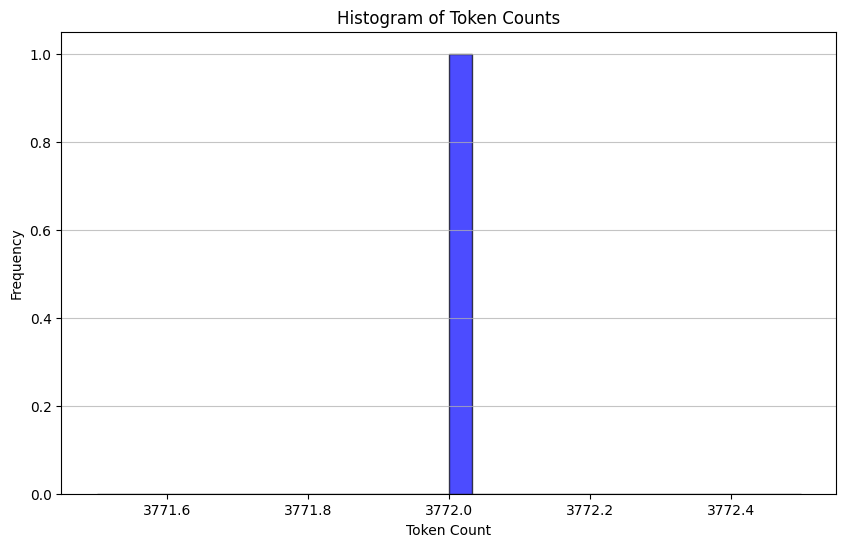

In [24]:
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show()